<a href="https://colab.research.google.com/github/JunSeokCheon/eCommerce_weblog_analysis/blob/master/eCommerce_weblog_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - 이번 프로젝트는 kaggle에서 제공하는 데이터셋인 eCommerce 웹 로그 데이터 분석 프로젝트이다.
### 1. 데이터 전처리
### 2. 데이터 분석 & 시각화
### 3. 데이터 모델링

#### 해당 파일은 데이터 분석 & 시각화 과정이다.
#### 이 과정에서는 총 4가지의 분석을 진행할 예정이다.
1. 일별 활성 사용자 수 분석
2. 사이트 체류 시간 분석
3. Funnel 분석
4. RFM 분석

해당 파일은 1,2,3번을 진행하고, RFM 분석은 별도의 파일에 정리 할 예정이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ecommerce_log_analysis

/content/drive/MyDrive/ecommerce_log_analysis


In [3]:
ls

2019-Nov.csv
2019-Oct.csv
data_load.ipynb
ecommerce-behavior-data-from-multi-category-store.zip
eCommerce_weblog_analysis.ipynb
eCommerce_weblog_preprocessing.ipynb
kaggle.json
refined_2019_Oct.csv


## 데이터 load & import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

%matplotlib inline

In [5]:
ecommerce_df = pd.read_csv("refined_2019_Oct.csv", index_col = 0)

In [9]:
ecommerce_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time
0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00
1,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 09:00:01
2,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 09:00:04
3,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01 09:00:05
4,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01 09:00:10


In [11]:
ecommerce_df['kst_time'] = pd.to_datetime(ecommerce_df['kst_time'])

In [12]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26560620 entries, 0 to 26560619
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_type     object        
 1   product_id     int64         
 2   category_id    int64         
 3   category_code  object        
 4   brand          object        
 5   price          float64       
 6   user_id        int64         
 7   user_session   object        
 8   kst_time       datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 1.8+ GB


## 일별 활성 사용자(Active User) 수 분석
활성 사용자 수는 방문수, 방문자 수의 개념과는 달리 '정해진 기간동안 접속한 사용자의 수'이다.

방문자의 수를 구할때 세션을 사용하지만, 실제 웹에 방문한 사용자 수는 이와 다르다.  
예를 들어 아래와 같이 사용자가 한 사이트에 3번 방문했으면, 방문수는 3회지만 일일 활성 사용자수는 1명인 것이다. 
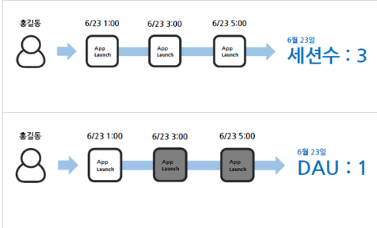  
이런 활성 사용자는 DAU, WAU, MAU 등의 종류가 있다.

전처리 과정에서 UTC time을 KST time으로 변환하고, 기존 문자열 데이터 타입을 datetime으로 바꿨기 때문에 일자별 데이터를 쉽게 추출 가능하다.

In [13]:
kst_day = []
for time in ecommerce_df['kst_time']:
  kst_day.append(time.day)
len(kst_day)

26560620

In [14]:
ecommerce_df['kst_day'] = kst_day
ecommerce_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time,kst_day
0,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,2019-10-01 09:00:00,1
1,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,2019-10-01 09:00:01,1
2,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,2019-10-01 09:00:04,1
3,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9,2019-10-01 09:00:05,1
4,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880,2019-10-01 09:00:10,1


In [15]:
day_df = ecommerce_df[['kst_day', 'user_id']]
day_df.head()

,kst_day,user_id
0,1,554748717
1,1,550050854
2,1,535871217
3,1,512742880
4,1,520571932


세션이 아닌 활성 사용자 수이니깐 중복을 제거하고, 일자별로 user_id를 그룹화하면 DAU를 구할 수 있다.

In [16]:
day_result = day_df.drop_duplicates()
group_day = day_result.groupby(['kst_day']).size()
group_day

kst_day
1     145002
2     138340
3     127033
4     152377
5     143013
6     140001
7     132010
8     140411
9     142693
10    139273
11    163524
12    147623
13    158097
14    155780
15    171997
16    171867
17    157497
18    165086
19    163601
20    167209
21    161799
22    160959
23    157204
24    150398
25    162831
26    151978
27    146832
28    140767
29    137033
30    135755
31    140015
dtype: int64

In [18]:
group_day.max()

171997

#### 해당 결과를 통해 10월 중 DAU가 가장 많은 날은 10월 15일임을 확인할 수 있다.

In [20]:
ecommerce_15_df = ecommerce_df[ecommerce_df['kst_day'] == 15]

## 사이트 체류 시간 분석
사이트 체류 시간은 말 그대로 사용자가 해당 사이트에 접속하여 머무른 시간이다.   
사이트 체류 시간 계산은 첫 번째 페이지뷰가 발생한 이후 마지막 페이지뷰가 발생한 시점까지의 시간차를 구하여 해당 방문자의 체류시간으로 한다.

위의 사이트 체류 시간의 개념을 적용하여 
데이터셋을 이용하여 실제 사용자들의 사이트 체류 시간을 구해보자.
 
사용자들의 페이지 접속 시간을 확인하기 위해 세션 ID를 기준으로 한다.  
사용자의 경우 동일한 ID여도 세션이 다르면은 다른 경우로 간주해야 한다.  
왜냐하면 세션은 일정 시간동안 같은 사용자(정확하게는 브라우저)로 부터 들어오는
일련의 요구를 하나의 상태로 보기 때문에 세션이 달라졌다면은
다른 시간대에 접속한 것으로 보는 것이 맞기 때문이다.  
**전체 데이터에서 DAU가 가장 많은 날인 10월 15일 데이터를 추출해서 사용할 것이다.**

In [23]:
ecommerce_15_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time,kst_day
11341987,view,1801860,2053013554415534427,electronics.video.tv,kivi,192.80,516432791,4714a811-a79f-4573-9a35-3b189d23cb17,2019-10-15,15
11341988,view,14100085,2053013557670314521,electronics.audio.acoustic,fender,167.83,517513158,07e4b6f0-6c42-4d06-899f-2008b5262e70,2019-10-15,15
11341989,view,2702628,2053013563911439225,appliances.kitchen.refrigerators,arg,175.01,556595389,5ea7ec8f-311d-438d-9e63-8e6873b54d9e,2019-10-15,15
11341990,view,1004246,2053013555631882655,electronics.smartphone,apple,764.34,520725383,fdd5396f-f86b-4ce4-b1e3-055fff36d06d,2019-10-15,15
11341991,view,3701197,2053013565983425517,appliances.environment.vacuum,xiaomi,94.98,548456694,98df3539-7acc-45f5-bd87-ced928555851,2019-10-15,15


그 다음 세션을 기준으로 user_id를 그룹핑하고, 동일한 세션에 대해 가장 마지막 시간대와 가장 최근 시간대를 만들어서 하나의 데이터프레임으로 저장한다.

In [31]:
max_session = ecommerce_15_df.groupby(['user_session', 'user_id'])['kst_time'].max()
min_session = ecommerce_15_df.groupby(['user_session', 'user_id'])['kst_time'].min()

In [32]:
max_session_df = pd.DataFrame(max_session)
max_session_df.rename(columns={"kst_time" : "max_session_time"}, inplace=True)
max_session_df

,,max_session_time
user_session,user_id,
00001417-945d-4ab1-a69c-3e6a13b186f2,559841837,2019-10-15 04:03:55
00005026-a9d1-4e2b-8290-3cc14e4bad89,520649833,2019-10-15 17:09:02
0000c8cf-785d-4cd8-9e8a-a64359cd9765,541638570,2019-10-15 15:29:42
00010de1-d987-4c57-9dd0-19131a3e8a19,515862421,2019-10-15 23:23:07
00015b16-9528-4066-9bbf-c1da047d060b,553543505,2019-10-15 15:34:06
...,...,...
ffff80c6-25ed-4d44-abcb-fe4cbc2adf4a,527916500,2019-10-15 00:51:55
ffff9087-0631-4654-bd7f-70d87397cecb,543695875,2019-10-15 18:56:50
ffff9ba5-4710-4825-85d4-df1af8d4bc24,550963842,2019-10-15 19:23:18


In [33]:
min_session_df = pd.DataFrame(min_session)
min_session_df.rename(columns={"kst_time" : "min_session_time"}, inplace=True)
min_session_df

,,min_session_time
user_session,user_id,
00001417-945d-4ab1-a69c-3e6a13b186f2,559841837,2019-10-15 04:03:55
00005026-a9d1-4e2b-8290-3cc14e4bad89,520649833,2019-10-15 17:02:19
0000c8cf-785d-4cd8-9e8a-a64359cd9765,541638570,2019-10-15 15:27:45
00010de1-d987-4c57-9dd0-19131a3e8a19,515862421,2019-10-15 23:19:13
00015b16-9528-4066-9bbf-c1da047d060b,553543505,2019-10-15 15:33:06
...,...,...
ffff80c6-25ed-4d44-abcb-fe4cbc2adf4a,527916500,2019-10-15 00:49:00
ffff9087-0631-4654-bd7f-70d87397cecb,543695875,2019-10-15 18:54:52
ffff9ba5-4710-4825-85d4-df1af8d4bc24,550963842,2019-10-15 18:48:06


두 개의 데이터프레임을 연결하고, max_session_time에서 min_session_time을 뺀 값을 세션 별 사이트 체류 시간인 session_time으로 정한다.

In [34]:
result_df = pd.concat([max_session_df, min_session_df], axis = 1)
result_df

,,max_session_time,min_session_time
user_session,user_id,,
00001417-945d-4ab1-a69c-3e6a13b186f2,559841837,2019-10-15 04:03:55,2019-10-15 04:03:55
00005026-a9d1-4e2b-8290-3cc14e4bad89,520649833,2019-10-15 17:09:02,2019-10-15 17:02:19
0000c8cf-785d-4cd8-9e8a-a64359cd9765,541638570,2019-10-15 15:29:42,2019-10-15 15:27:45
00010de1-d987-4c57-9dd0-19131a3e8a19,515862421,2019-10-15 23:23:07,2019-10-15 23:19:13
00015b16-9528-4066-9bbf-c1da047d060b,553543505,2019-10-15 15:34:06,2019-10-15 15:33:06
...,...,...,...
ffff80c6-25ed-4d44-abcb-fe4cbc2adf4a,527916500,2019-10-15 00:51:55,2019-10-15 00:49:00
ffff9087-0631-4654-bd7f-70d87397cecb,543695875,2019-10-15 18:56:50,2019-10-15 18:54:52
ffff9ba5-4710-4825-85d4-df1af8d4bc24,550963842,2019-10-15 19:23:18,2019-10-15 18:48:06


In [35]:
result_df['session_time'] = result_df['max_session_time'] - result_df['min_session_time']
result_df

,,max_session_time,min_session_time,session_time
user_session,user_id,,,
00001417-945d-4ab1-a69c-3e6a13b186f2,559841837,2019-10-15 04:03:55,2019-10-15 04:03:55,0 days 00:00:00
00005026-a9d1-4e2b-8290-3cc14e4bad89,520649833,2019-10-15 17:09:02,2019-10-15 17:02:19,0 days 00:06:43
0000c8cf-785d-4cd8-9e8a-a64359cd9765,541638570,2019-10-15 15:29:42,2019-10-15 15:27:45,0 days 00:01:57
00010de1-d987-4c57-9dd0-19131a3e8a19,515862421,2019-10-15 23:23:07,2019-10-15 23:19:13,0 days 00:03:54
00015b16-9528-4066-9bbf-c1da047d060b,553543505,2019-10-15 15:34:06,2019-10-15 15:33:06,0 days 00:01:00
...,...,...,...,...
ffff80c6-25ed-4d44-abcb-fe4cbc2adf4a,527916500,2019-10-15 00:51:55,2019-10-15 00:49:00,0 days 00:02:55
ffff9087-0631-4654-bd7f-70d87397cecb,543695875,2019-10-15 18:56:50,2019-10-15 18:54:52,0 days 00:01:58
ffff9ba5-4710-4825-85d4-df1af8d4bc24,550963842,2019-10-15 19:23:18,2019-10-15 18:48:06,0 days 00:35:12


In [39]:
result_df.sort_values(by=['session_time'], axis = 0, ascending = False, inplace = True)
result_df

,,max_session_time,min_session_time,session_time
user_session,user_id,,,
8df3a3a5-916c-4d7d-873c-50cc0d7bd036,525137566,2019-10-15 23:21:37,2019-10-15 00:00:53,0 days 23:20:44
b0cabc25-3127-4563-a55b-efe722df3502,560180649,2019-10-15 23:57:49,2019-10-15 00:52:51,0 days 23:04:58
5486bf7f-ea6c-47cc-b3ca-e5755107a09d,542193432,2019-10-15 23:26:42,2019-10-15 00:25:50,0 days 23:00:52
8449eb11-92c6-4b28-b1df-2ba9f8dfc5a1,539472273,2019-10-15 23:11:19,2019-10-15 00:13:02,0 days 22:58:17
a7542771-f08f-4e17-bdf0-5c701de61282,545918716,2019-10-15 23:45:59,2019-10-15 00:49:05,0 days 22:56:54
...,...,...,...,...
c79ac5e6-651f-40a0-b119-c82e6b728ca5,512828277,2019-10-15 20:31:33,2019-10-15 20:31:33,0 days 00:00:00
c79a7158-ba80-480c-9d5f-b45f50e22c8e,559187335,2019-10-15 16:14:44,2019-10-15 16:14:44,0 days 00:00:00
c799bf97-7aab-4fb1-b1cc-18051f4dff55,529383646,2019-10-15 13:28:57,2019-10-15 13:28:57,0 days 00:00:00


#### 사용자 세션 시간이 최대 23시간인 사용자도 있었고, 0초(0초 이하라고 판단)인 사용자도 존재한다.

## Funnel 분석
funnel은 깔대기라는 뜻으로 funnel 분석은 깔대기의 원리와 같다.  
깔대기가 필터링 될 수록 걸러지듯이 funnel 분석도 스탭에 따라 고객에 대한 분석이 가능하다.  

funnel 분석은 단계에 따라 고객의 이탈율을 확인하여 그에 대한 조치를 가능하도록 도와주는 분석 방법이다.

eCommerce 데이터를 이용하여 view -> cart -> purchase로 이어지는 funnel 수치를 계산하기 위해 사이트 체류 시간 분석에 사용한 10월 15일 데이터를 사용할 것이다.

In [40]:
ecommerce_15_df.head()

,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,kst_time,kst_day
11341987,view,1801860,2053013554415534427,electronics.video.tv,kivi,192.80,516432791,4714a811-a79f-4573-9a35-3b189d23cb17,2019-10-15,15
11341988,view,14100085,2053013557670314521,electronics.audio.acoustic,fender,167.83,517513158,07e4b6f0-6c42-4d06-899f-2008b5262e70,2019-10-15,15
11341989,view,2702628,2053013563911439225,appliances.kitchen.refrigerators,arg,175.01,556595389,5ea7ec8f-311d-438d-9e63-8e6873b54d9e,2019-10-15,15
11341990,view,1004246,2053013555631882655,electronics.smartphone,apple,764.34,520725383,fdd5396f-f86b-4ce4-b1e3-055fff36d06d,2019-10-15,15
11341991,view,3701197,2053013565983425517,appliances.environment.vacuum,xiaomi,94.98,548456694,98df3539-7acc-45f5-bd87-ced928555851,2019-10-15,15


funnel 분석에 필요한 컬럼들을 새로운 데이터프레임에 저장한다.  
그리고 이 데이터프레임에서 user_session과 event_type을 가지고 시간을 기준으로 그룹핑을 진행한다.  
최소 접속 시간을 기준으로 하기 위해 min() 사용한다. 

In [43]:
ecommerce_15_need_df = ecommerce_15_df[['kst_time', 'event_type', 'user_session']].copy()
ecommerce_15_need_df

,kst_time,event_type,user_session
11341987,2019-10-15 00:00:00,view,4714a811-a79f-4573-9a35-3b189d23cb17
11341988,2019-10-15 00:00:00,view,07e4b6f0-6c42-4d06-899f-2008b5262e70
11341989,2019-10-15 00:00:00,view,5ea7ec8f-311d-438d-9e63-8e6873b54d9e
11341990,2019-10-15 00:00:00,view,fdd5396f-f86b-4ce4-b1e3-055fff36d06d
11341991,2019-10-15 00:00:00,view,98df3539-7acc-45f5-bd87-ced928555851
...,...,...,...
12346749,2019-10-15 23:59:59,view,c181c4c3-7472-4473-9a72-a9a6d33d7d3e
12346750,2019-10-15 23:59:59,view,440fa140-c6a2-49e8-afdb-8b2f4fbb2add
12346751,2019-10-15 23:59:59,view,6ca358ed-edc1-4959-9d80-49ad2374063a
12346752,2019-10-15 23:59:59,view,8ca22b7c-7fed-4560-91b0-ec4754c2c1b4


In [44]:
min_groupped = ecommerce_15_need_df.groupby(['user_session', 'event_type'])['kst_time'].min()
min_groupped

user_session                          event_type
00001417-945d-4ab1-a69c-3e6a13b186f2  view         2019-10-15 04:03:55
00005026-a9d1-4e2b-8290-3cc14e4bad89  cart         2019-10-15 17:03:21
                                      purchase     2019-10-15 17:09:02
                                      view         2019-10-15 17:02:19
0000c8cf-785d-4cd8-9e8a-a64359cd9765  view         2019-10-15 15:27:45
                                                           ...        
ffff9087-0631-4654-bd7f-70d87397cecb  cart         2019-10-15 18:55:08
                                      view         2019-10-15 18:54:52
ffff9ba5-4710-4825-85d4-df1af8d4bc24  view         2019-10-15 18:48:06
ffff9c3a-f8f7-4c61-9063-db54ce22a75d  view         2019-10-15 16:27:48
ffffdfd1-3179-473e-88e3-534ba4681f83  view         2019-10-15 00:17:35
Name: kst_time, Length: 284063, dtype: datetime64[ns]

funnel 스탭을 위한 새로운 데이터프레임을 만든다. (view -> cart -> purchase)

In [52]:
funnel_steps = pd.DataFrame({"steps" : [1, 2, 3]}, index = ['view', 'cart', 'purchase'])
funnel_steps

,steps
view,1
cart,2
purchase,3


min_groupped을 데이터프레임화하고 funnel_steps와 event_type을 기준으로 merge 진행한다.

In [46]:
groupped = pd.DataFrame(min_groupped).merge(funnel_steps, left_on = 'event_type', right_index = True)
groupped

,,kst_time,steps
user_session,event_type,,
00001417-945d-4ab1-a69c-3e6a13b186f2,view,2019-10-15 04:03:55,1
00005026-a9d1-4e2b-8290-3cc14e4bad89,view,2019-10-15 17:02:19,1
0000c8cf-785d-4cd8-9e8a-a64359cd9765,view,2019-10-15 15:27:45,1
00010de1-d987-4c57-9dd0-19131a3e8a19,view,2019-10-15 23:19:13,1
00015b16-9528-4066-9bbf-c1da047d060b,view,2019-10-15 15:33:06,1
...,...,...,...
ffe04b41-43b9-4e11-9c23-48300993a80d,purchase,2019-10-15 17:10:26,3
ffe7093b-b3e8-467c-a003-24cbdbb3dc78,purchase,2019-10-15 22:38:34,3
ffeb953c-5f5f-4f36-b9c3-c7d0cd2c8f02,purchase,2019-10-15 00:10:27,3


피벗 테이블 이용하여 세션 id 별 단계의 진행 여부를 확인한다.  
columns이 숫자가 아닌 단계에 맞는 텍스트로 변경한다.

In [49]:
funnel_result = groupped.reset_index().pivot(index='user_session', columns='steps', values='kst_time')
funnel_result.columns = funnel_steps.index
funnel_result

,view,cart,purchase
user_session,,,
00001417-945d-4ab1-a69c-3e6a13b186f2,2019-10-15 04:03:55,NaT,NaT
00005026-a9d1-4e2b-8290-3cc14e4bad89,2019-10-15 17:02:19,2019-10-15 17:03:21,2019-10-15 17:09:02
0000c8cf-785d-4cd8-9e8a-a64359cd9765,2019-10-15 15:27:45,NaT,NaT
00010de1-d987-4c57-9dd0-19131a3e8a19,2019-10-15 23:19:13,NaT,NaT
00015b16-9528-4066-9bbf-c1da047d060b,2019-10-15 15:33:06,NaT,NaT
...,...,...,...
ffff80c6-25ed-4d44-abcb-fe4cbc2adf4a,2019-10-15 00:49:00,NaT,NaT
ffff9087-0631-4654-bd7f-70d87397cecb,2019-10-15 18:54:52,2019-10-15 18:55:08,NaT
ffff9ba5-4710-4825-85d4-df1af8d4bc24,2019-10-15 18:48:06,NaT,NaT


마지막으로 단계별로 카운트하여 funnel 수치를 구한다.

In [50]:
step_counts = [funnel_result[column].notnull().sum() for column in funnel_result.columns]
step_counts

[240333, 26589, 17141]

위 결과를 보면 view에서 cart로 이어지는 구간에는 user가 많이 감소하지만, cart에서 purchase까지는 어느정도 잘 이어지는 것을 확인할 수 있다.

#### funnel 시각화

In [51]:
import plotly.express as px
data = dict(
    number=[240333, 26589, 17141],
    stage=["view", "cart", "purchase"])
fig = px.funnel(data, x='number', y='stage')
fig.show()

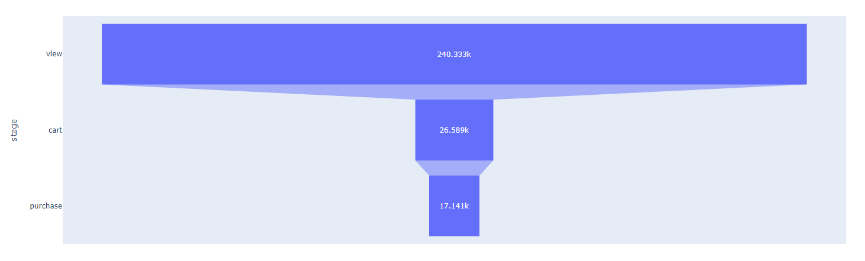